# Описание проекта

Нам предстоит разработка модели, которая должна предсказать коэффициент восстановления золота из золотосодержащей руды. В нашем распоряжении данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.


# 1. Подготовка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer
import warnings

Загрузим данные:

In [2]:
gold_recovery_train = pd.read_csv('train.csv')
gold_recovery_test = pd.read_csv('test.csv')
gold_recovery_full = pd.read_csv('full.csv')
df_list = [gold_recovery_train, gold_recovery_test, gold_recovery_full]

In [3]:
gold_recovery_train.head(3)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363


In [4]:
gold_recovery_test.head(3)

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559


In [5]:
gold_recovery_full.head(3)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363


- Видим, что в тестовой выборке выгружены не все признаки.
- Кроме того, среди всех данных выделяется немалое количество пропусков

### 1.2. Проверка расчета эффективности обогащения

Напишем функцию расчет эффективности:

In [6]:
def recovery(row):
    C = row['rougher.output.concentrate_au']
    F = row['rougher.input.feed_au']
    T = row['rougher.output.tail_au']
    result = (C*(F-T))/(F*(C-T))*100
    return result

Чтобы не было деления на 0, заменим их на NaN и удалим вместе с остальными пропусками на время анализа:

In [7]:
df = gold_recovery_train.replace(0, np.NaN) # меняем 0 на пропуск
df = df.dropna(subset=['rougher.output.concentrate_au',
                       'rougher.input.feed_au', 'rougher.output.tail_au', 'rougher.output.recovery']) # удаляем пропуски
df['rougher.output.recovery_verification'] = df.apply(recovery, axis=1) # применим функцию

Посчитаем MAE полученной эффективности с исходной:

In [8]:
mean_absolute_error(df['rougher.output.recovery_verification'], df['rougher.output.recovery'])

9.661285240080234e-15

**Ошибка очень маленькая - значит, что эффективность посчитана правильно**

### 1.3. Анализ признаков, недоступных в тестовой выборке

Определим эти признаки, вычленив их из тренировочной выборки:

In [9]:
df1 = gold_recovery_train.drop(gold_recovery_test.columns, axis=1)

In [10]:
df1.columns

Index(['final.output.concentrate_ag', 'final.output.concentrate_pb',
       'final.output.concentrate_sol', 'final.output.concentrate_au',
       'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_pb',
       'final.output.tail_sol', 'final.output.tail_au',
       'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_pb',
       'primary_cleaner.output.tail_sol', 'primary_cleaner.output.tail_au',
       'rougher.calculation.sulfate_to_au_concentrate',
       'rougher.calculation.floatbank10_sulfate_to_au_feed',
       'rougher.calculation.floatbank11_sulfate_to_au_feed',
       'rougher.calculation.au_pb_ratio', 'rougher.output.concentrate_ag',
       'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol',
       'rougher.output.concentrate_au', 'rougher.outpu

Видим:
- результаты флотации по металлам и хвостам
- результаты первой чистки по металлам и хвосты
- результаты творой чистки  по хвостам
- финальные концентрации металлов
- финальные концентрации в хвостах
- финальная эффективность

**Использование этих данных может привести к "утечке" целевого признака. Возможно поэтому они не включены в тестовую выборку**

### 1.4 Предобработка данных
Необходимо:
- привести все данные к единым индексам
- избавиться от пропусков
- в тестовую выборку добавить целевые признаки из полного набора данных

**Сделаем индексами дату и время процесса:**

In [11]:
df_train = gold_recovery_train.set_index('date')
df_test = gold_recovery_test.set_index('date')
df_full = gold_recovery_full.set_index('date')

**Удалим пропуски:** (изначально заполнял по "верхнему" методом ffill, однако итоговые результаты были хуже)

In [12]:
df_train = df_train.dropna()
df_test = df_test.dropna()

**Передадим в тестовую выборку значения целевых признаков:**

In [13]:
df_test['rougher.output.recovery'] = df_full.loc[df_test.index]['rougher.output.recovery']
df_test['final.output.recovery'] = df_full.loc[df_test.index]['final.output.recovery']

Мы провели предобработку данных, двигаемся дальше

# 2. Анализ данных

### Измнение концентрации металлов (Au, Ag, Pb) на различных этапах очистки:

In [14]:
# Концентрация золота:
conc_rougher_au = df_train['rougher.output.concentrate_au'].mean().round(2)
conc_primary_au = df_train['primary_cleaner.output.concentrate_au'].mean().round(2)
conc_final_au = df_train['final.output.concentrate_au'].mean().round(2)
# Концентрация серебра:
conc_rougher_ag = df_train['rougher.output.concentrate_ag'].mean().round(2)
conc_primary_ag = df_train['primary_cleaner.output.concentrate_ag'].mean().round(2)
conc_final_ag = df_train['final.output.concentrate_ag'].mean().round(2)
# Концентрация свинца:
conc_rougher_pb = df_train['rougher.output.concentrate_pb'].mean().round(2)
conc_primary_pb = df_train['primary_cleaner.output.concentrate_pb'].mean().round(2)
conc_final_pb = df_train['final.output.concentrate_pb'].mean().round(2)

In [15]:
data = [['После флотации', conc_rougher_au, conc_rougher_ag, conc_rougher_pb],
                 ['После 1й чистки', conc_primary_au, conc_primary_ag, conc_primary_pb],
                 ['После 2й чистки', conc_final_au, conc_final_ag, conc_final_pb]
                ]
df_concentration = pd.DataFrame(data, columns = ['Этап', 'Золото','Серебро', 'Свинец'])
df_concentration

,Этап,Золото,Серебро,Свинец
0,После флотации,19.78,11.84,7.61
1,После 1й чистки,32.38,8.44,9.57
2,После 2й чистки,44.13,5.16,10.17


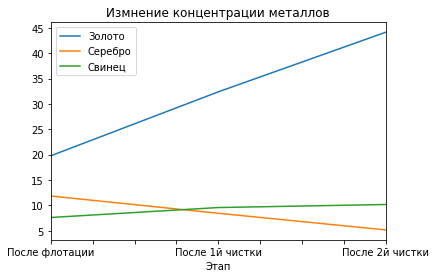

In [17]:
df_concentration.plot(x='Этап')
plt.title('Измнение концентрации металлов')
plt.show()

**С каждым этапом растет концентрация золота - на это и нацелен процесс,  при этом концентрация серебра снижается, а свинца увеличивается**

### Распределение размеров гранул сырья на обучающей и тестовой выборках

**После флотации:**

После флотации (трен. выборка): 57.22
После флотации (тест. выборка): 56.34


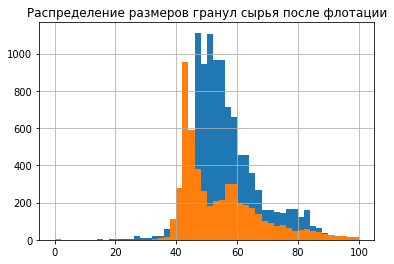

In [18]:
print('После флотации (трен. выборка): {:.2f}'.format(df_train['rougher.input.feed_size'].mean()))
print('После флотации (тест. выборка): {:.2f}'.format(df_test['rougher.input.feed_size'].mean()))
df_train['rougher.input.feed_size'].hist(bins=50, range=(0, 100))
df_test['rougher.input.feed_size'].hist(bins=50, range=(0, 100))
plt.title('Распределение размеров гранул сырья после флотации')
plt.show()

**После 1й очистки:**

После 1й очистки (трен. выборка): 7.40
После 1й очистки (тест. выборка): 7.27


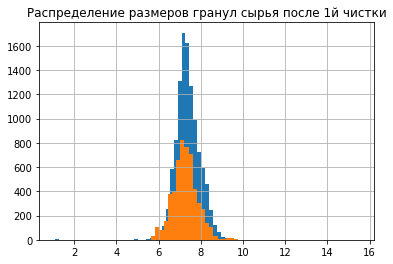

In [19]:
print('После 1й очистки (трен. выборка): {:.2f}'.format(df_train['primary_cleaner.input.feed_size'].mean()))
print('После 1й очистки (тест. выборка): {:.2f}'.format(df_test['primary_cleaner.input.feed_size'].mean()))
df_train['primary_cleaner.input.feed_size'].hist(bins=50)
df_test['primary_cleaner.input.feed_size'].hist(bins=50)
plt.title('Распределение размеров гранул сырья после 1й чистки')
plt.show()

**Размеры гранул соответствующийх этапов довольно близки, что не препятствует дальнейшей работе**

### Суммарная концентрация всех веществ на разных стадиях

Рассчитаем суммарные концентрации веществ на стадиях:
- перед флотацией
- после первой очистки (продукт)
- финальная концентрация (продукт)

In [20]:
def sum_rougher_input(row):
    result = (row['rougher.input.feed_au'] + row['rougher.input.feed_ag'] + row['rougher.input.feed_sol'] 
    + row['rougher.input.feed_au'])
    return result

def sum_primary_cleaner_output(row):
    result = (row['primary_cleaner.output.concentrate_au'] + row['primary_cleaner.output.concentrate_ag'] 
    + row['primary_cleaner.output.concentrate_sol'] + row['primary_cleaner.output.concentrate_au'])
    return result

def sum_final_output(row):
    result = (row['final.output.concentrate_au'] + row['final.output.concentrate_ag'] 
    + row['final.output.concentrate_sol'] + row['final.output.concentrate_au'])
    return result

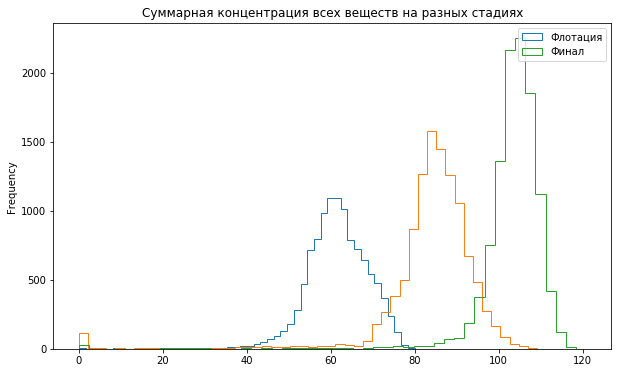

In [21]:
# суммарная концентрация всех на тесте перед флотацией
df_train['sum_rougher_input'] = df_train.apply(sum_rougher_input, axis=1)
# суммарная концентрация всех на тесте после первой чистки
df_train['sum_primary_cleaner_output'] = df_train.apply(sum_primary_cleaner_output, axis=1)
# суммарная концентрация всех на тесте финальное
df_train['sum_final_output'] = df_train.apply(sum_final_output, axis=1)
# гистограммы:
df_train['sum_rougher_input'].plot(kind='hist',bins=50, histtype='step', figsize = (10, 6), label='Флотация', legend=True)
df_train['sum_primary_cleaner_output'].plot(kind='hist', bins=50, histtype='step', figsize = (10, 6), label='1я чистка')
df_train['sum_final_output'].plot(kind='hist', bins=50, histtype='step', figsize = (10, 6), label='Финал', legend=True)
plt.title('Суммарная концентрация всех веществ на разных стадиях')
plt.show()

**Видим пики на нулевых значениях, эти данные необходимо удалить (отсекаем суммы по 0,1 так как в данных много объектов с недевкатным значением 0.010000)**

In [22]:
df_train_good = df_train.query('sum_rougher_input>0.1 and sum_primary_cleaner_output>0.1 and sum_final_output>0.1').copy()

# 3. Модель
### 3.1 Функция для вычисления итоговой sMAPE

Запишем функции:
- smape частного
- smape общего

И создадим метрику smape для использования в кросс валидации:

In [23]:
def smape(target, predictions): # smape частного
    return 100/len(target) * np.sum(2*np.abs(predictions - target) / (np.abs(target) + np.abs(predictions)))

def smape_itog(smape_rougher, smape_final): # smape общего
    return smape_rougher*0.25 + smape_final*0.75

my_scorer = make_scorer(smape) # smape для использования в кросс валидации

Оставим в тренировочной выборке признаки, которые есть в тестовой:

In [24]:
df_train_good = df_train_good[df_test.columns]

Выделим признаки и цели из тренировочной и тестовой выборки:

In [25]:
features_train = df_train_good.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)
target_train1 = df_train_good['rougher.output.recovery'] # таргет эффективности флотации
target_train2 = df_train_good['final.output.recovery'] # таргет финальной эффективности

features_test = df_test.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)
target_test1 = df_test['rougher.output.recovery'] # таргет эффективности флотации
target_test2 = df_test['final.output.recovery'] # таргет финальной эффективности

Создадим модели и с помощью кросс-валидации определим лучшую:

In [26]:
warnings.filterwarnings("ignore")
# создадаем модели:
model_DTR = DecisionTreeRegressor(random_state=12345) 
model_RFR = RandomForestRegressor(random_state=12345)
model_LR = LinearRegression()

# Определим средниие показатели smape для прогноза эффективности флотации и финальной эффективности:
final_score_DTR1 = pd.Series(cross_val_score(model_DTR, features_train, target_train1, cv=5, scoring=my_scorer)).mean()
final_score_DTR2 = pd.Series(cross_val_score(model_DTR, features_train, target_train2, cv=5, scoring=my_scorer)).mean()
final_score_RFR1 = pd.Series(cross_val_score(model_RFR, features_train, target_train1, cv=5, scoring=my_scorer)).mean()
final_score_RFR2 = pd.Series(cross_val_score(model_RFR, features_train, target_train2, cv=5, scoring=my_scorer)).mean()
final_score_LR1 = pd.Series(cross_val_score(model_LR, features_train, target_train1, cv=5, scoring=my_scorer)).mean()
final_score_LR2 = pd.Series(cross_val_score(model_LR, features_train, target_train2, cv=5, scoring=my_scorer)).mean()

# Выведем общие показатели smape:
print('smape DTR: {:.2f}'.format(smape_itog(final_score_DTR1, final_score_DTR2)))
print('smape RFR: {:.2f}'.format(smape_itog(final_score_RFR1, final_score_RFR2)))
print('smape LR:  {:.2f}'.format(smape_itog(final_score_LR1, final_score_LR2)))

smape DTR: 19.58
smape RFR: 10.87
smape LR:  9.71


**Лучший результат показал случайный лес**

Теперь проверим на тестовой выборке:

In [27]:
model_LR_test1 = LinearRegression()
model_LR_test1.fit(features_train, target_train1)
predictions_test1 = model_LR_test1.predict(features_test)
smape_rougher = smape(target_test1, predictions_test1)
        
model_LR_test2 = LinearRegression()
model_LR_test2.fit(features_train, target_train2)
predictions_test2 = model_LR_test2.predict(features_test)
smape_final = smape(target_test2, predictions_test2)
        
smape_itogs = smape_itog(smape_rougher, smape_final)
print('smape =', smape_itogs)

smape = 9.519584830358102


**Итог smape = 9.6**

## Общие выводы
- Мы проанализировали и обработали данные
- Проанализировали измнение концентрации металлов (Au, Ag, Pb) на различных этапах очистки:

In [28]:
df_concentration

,Этап,Золото,Серебро,Свинец
0,После флотации,19.78,11.84,7.61
1,После 1й чистки,32.38,8.44,9.57
2,После 2й чистки,44.13,5.16,10.17


**С каждым этапом растет концентрация золота - на это и нацелен процесс**,  при этом концентрация серебра снижается, а свинца увеличивается
- Сравнили **распределения размеров гранул** сырья на обучающей и тестовой выборках - **результаты близки**
- Исследовали **суммарную концентрацию всех веществ на разных стадиях и устранили аномалии**
- Построили несколько моделей и на основании общей метрики sMAPE выбрали **лучшую - модель линейной регрессии**
- **Проверили модель на тестовой выборке** и получили результат **sMAPE=9.14**